In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-product-reviews/ratings_Electronics (1).csv


In [4]:
dataset = pd.read_csv('/kaggle/input/amazon-product-reviews/ratings_Electronics (1).csv')
dataset.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [5]:
dataset.columns=['User_id','Product_id','rating','Timestamp']

In [7]:
dataset.head()

,User_id,Product_id,rating,Timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [8]:
import pandas as pd


# collect all unique user ids 
unique_user_ids = dataset['User_id'].unique()

#convert each user id to numeric
user_id_to_numeric = {user_id: idx for idx, user_id in enumerate(unique_user_ids, start=1)}
#map each numeric user id to actual user id
dataset['user_id_numeric'] = dataset['User_id'].map(user_id_to_numeric)

# same 
unique_product_ids = dataset['Product_id'].unique()
product_id_to_numeric = {product_id: idx for idx, product_id in enumerate(unique_product_ids, start=1)}
dataset['product_id_numeric'] = dataset['Product_id'].map(product_id_to_numeric)

# Display the DataFrame
dataset.head()


,User_id,Product_id,rating,Timestamp,user_id_numeric,product_id_numeric
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,1,1
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,2,2
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,3,2
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,4,2
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600,5,3


In [9]:
dataset.tail(50)

,User_id,Product_id,rating,Timestamp,user_id_numeric,product_id_numeric
7824431,A2ZY33DQLK70QG,B00LH52WT4,5.0,1404691200,4085027,475975
7824432,A29LYS3MI7IFX9,B00LH9OL5I,5.0,1404864000,4201677,475976
7824433,A1CKXBVYL2PUYD,B00LHPXVBW,5.0,1404345600,4199263,475977
7824434,A3EF05K8Y74W6J,B00LI4U2B4,5.0,1404864000,389812,475978
7824435,A3AYSYSLHU26U9,B00LI4ZZO8,4.0,1405296000,133253,475979
7824436,A2NDJVP5ONY00D,B00LI4ZZO8,5.0,1405382400,3686006,475979
7824437,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0,1405209600,10553,475979
7824438,A2K47O5IHVR23E,B00LI8Y9Y6,5.0,1405728000,4201678,475980
7824439,ASS799E7X3F7O,B00LITPNRC,5.0,1405209600,196701,475981
7824440,A1W7UGF4Y843PY,B00LJO86NE,5.0,1405814400,4201679,475982


In [10]:
dataset.drop(['User_id','Product_id'],axis=1,inplace=True)

In [11]:
dataset.head()

,rating,Timestamp,user_id_numeric,product_id_numeric
0,5.0,1341100800,1,1
1,1.0,1367193600,2,2
2,3.0,1374451200,3,2
3,1.0,1334707200,4,2
4,5.0,1397433600,5,3


In [12]:
#reorder the columns 
dataset = dataset[['user_id_numeric', 'product_id_numeric', 'rating', 'Timestamp']]

In [13]:
#too many products lets  cut 
dataset.shape

(7824481, 4)

In [14]:
#i'll pick only 50k
dataset= dataset.head(50000)

In [15]:
dataset.shape

(50000, 4)

In [16]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dataset,test_size=0.2)


In [17]:
train.head()

,user_id_numeric,product_id_numeric,rating,Timestamp
46607,43483,3299,5.0,980208000
2140,2126,60,2.0,1344816000
41515,38931,3014,3.0,961286400
20774,19962,2078,5.0,969408000
30542,29214,2457,4.0,1238371200


In [18]:
test.head()

,user_id_numeric,product_id_numeric,rating,Timestamp
45932,42879,3268,5.0,1403654400
5885,5811,586,5.0,1366588800
33794,32074,2692,5.0,1371772800
45537,42502,3268,5.0,1284768000
46160,43095,3268,5.0,1357948800


# **Define MATRIX FACTORIZATION model**

****Define input layer for model****

In [19]:
from keras.models import Model 
from keras.layers import Embedding,Flatten,Input,dot

latent_dim = 10 


product_input = Input(shape=[1],name='product-input')
user_input = Input(shape =[1],name='user-input')


num_users = len(dataset.user_id_numeric.unique())
num_product = len(dataset.product_id_numeric.unique())

2024-08-02 09:45:56.873631: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-02 09:45:56.873793: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-02 09:45:57.037608: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


****Define embeddings****

In [20]:

product_embedding = Embedding(num_product + 1, latent_dim, name='product-embedding')(product_input)
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)


**Flatten The embeddings**

In [21]:
#(batch_size, n, m), the output will be of shape (batch_size, n * m)

product_vec = Flatten(name='product-flatten')(product_embedding)
user_vec = Flatten(name='user-flatten')(user_embedding)

**Define inference method for model**

In [22]:
# Compute dot product of Item and user embeddings
prod = dot([product_vec, user_vec], axes=-1, normalize=False, name='dot-product')

# Define the model
model = Model([user_input, product_input], prod)

# Display the model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ product-input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user-input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ product-embedding   │ (None, 1, 10)     │     34,460 │ product-input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user-embedding      │ (None, 1, 10)     │    465,550 │ user-input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ product-flatten     │ (None, 10)        │          0 │ product-embeddin… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user-flatten        │ (None, 10)        │          0 │ user-embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot-product (Dot)   │ (None, 1)         │          0 │ product-flatten[… │
│                     │                   │            │ user-flatten[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 500,010 (1.91 MB)

 Trainable params: 500,010 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error 

model.compile(optimizer='adam',loss='mean_squared_error')

# Train the model
history = model.fit([train.user_id_numeric, train.product_id_numeric], train.rating, epochs=10)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 18.1383
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 17.9310
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 16.7707
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 13.8049
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 10.4548
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 7.7729
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.8046
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.3154
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.3651
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.5371


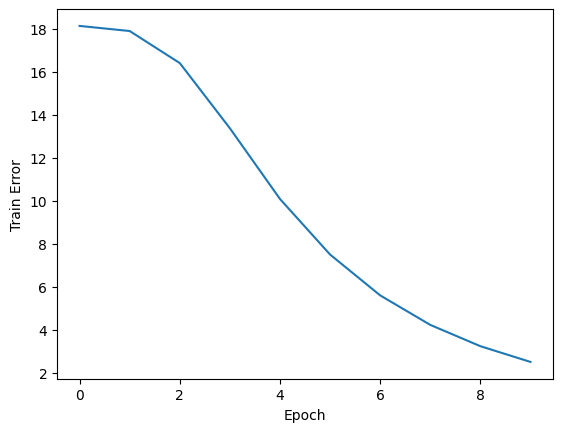

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Absolute Error: 4.031767000062391


In [24]:
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()


y_hat = np.round(model.predict([test.user_id_numeric, test.product_id_numeric]), decimals=2)
y_true = test.rating
mae = mean_absolute_error(y_true, y_hat)
print("Mean Absolute Error:", mae)


# **NeuMF**

**Define input shape**

In [25]:
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Dropout, Dense, BatchNormalization, Concatenate, Dot
from keras.optimizers import Adam

latent_dim = 10

# Define inputs
product_input = Input(shape=[1], name='product-input')
user_input = Input(shape=[1], name='user-input')

**MLP Embeddings**

In [26]:

# MLP Embeddings
product_embedding_mlp = Embedding(num_product + 1, latent_dim, name='product-embedding-mlp')(product_input)
product_vec_mlp = Flatten(name='flatten-product-mlp')(product_embedding_mlp)

user_embedding_mlp = Embedding(num_users + 1, latent_dim, name='user-embedding-mlp')(user_input)
user_vec_mlp = Flatten(name='flatten-user-mlp')(user_embedding_mlp)

**MLP model**

In [27]:
# MLP layers
concat = Concatenate(name='concat')([product_vec_mlp, user_vec_mlp])
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(100, name='fc-1', activation='relu')(concat_dropout)
fc_1_bn = BatchNormalization(name='batch-norm-1')(fc_1)
fc_1_dropout = Dropout(0.2)(fc_1_bn)
fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_bn = BatchNormalization(name='batch-norm-2')(fc_2)
fc_2_dropout = Dropout(0.2)(fc_2_bn)

# Prediction from both layers
pred_mlp = Dense(10, name='pred-mlp', activation='relu')(fc_2_dropout)

**MF Embeddings**

In [28]:

# MF Embeddings
product_embedding_mf = Embedding(num_product + 1, latent_dim, name='product-embedding-mf')(product_input)
product_vec_mf = Flatten(name='flatten-product-mf')(product_embedding_mf)

user_embedding_mf = Embedding(num_users + 1, latent_dim, name='user-embedding-mf')(user_input)
user_vec_mf = Flatten(name='flatten-user-mf')(user_embedding_mf)


**combine MLP and MF**

In [29]:

pred_mf = Dot(axes=-1, name='pred-mf')([product_vec_mf, user_vec_mf])
combine_mlp_mf = Concatenate(name='combine-mlp-mf')([pred_mf, pred_mlp])

# Final prediction
result = Dense(1, name='result', activation='relu')(combine_mlp_mf)

model = Model([user_input, product_input], result)
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 1.2103
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.8545
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.6581
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.4986
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.4005
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.3585
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.3180
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.3035
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.2825
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.2634


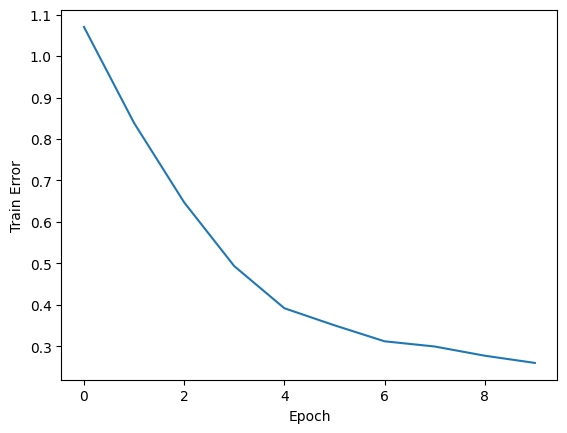

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


1.0147140049993992

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Train the model
history = model.fit([train.user_id_numeric, train.product_id_numeric], train.rating, epochs=10)

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

# Predict and calculate mean absolute error
y_hat = np.round(model.predict([test.user_id_numeric, test.product_id_numeric]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)
